## Classification Model

In [3]:
import pandas as pd


In [4]:
df=pd.read_csv('musk_csv.csv')
df.head(5)

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,1,MUSK-211,211_1+1,46,-108,-60,-69,-117,49,38,...,-308,52,-7,39,126,156,-50,-112,96,1
1,2,MUSK-211,211_1+10,41,-188,-145,22,-117,-6,57,...,-59,-2,52,103,136,169,-61,-136,79,1
2,3,MUSK-211,211_1+11,46,-194,-145,28,-117,73,57,...,-134,-154,57,143,142,165,-67,-145,39,1
3,4,MUSK-211,211_1+12,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,136,168,-60,-135,80,1
4,5,MUSK-211,211_1+13,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,137,168,-60,-135,80,1


In [6]:
df.isnull().any().sum()

0

In [7]:
df.tail(5)

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
6593,6594,NON-MUSK-jp13,jp13_2+5,51,-123,-23,-108,-117,134,-160,...,-66,164,-14,-29,107,171,-44,-115,118,0
6594,6595,NON-MUSK-jp13,jp13_2+6,44,-104,-19,-105,-117,142,-165,...,-51,166,-9,150,129,158,-66,-144,-5,0
6595,6596,NON-MUSK-jp13,jp13_2+7,44,-102,-19,-104,-117,72,-165,...,90,117,-8,150,130,159,-66,-144,-6,0
6596,6597,NON-MUSK-jp13,jp13_2+8,51,-121,-23,-106,-117,63,-161,...,86,99,-14,-31,106,171,-44,-116,117,0
6597,6598,NON-MUSK-jp13,jp13_2+9,51,-122,-23,-106,-117,190,-161,...,40,124,-14,-30,107,171,-44,-115,118,0


In [6]:
df['class'].value_counts()

0    5581
1    1017
Name: class, dtype: int64

In [10]:
x1=df['molecule_name']

In [12]:
x2=df['conformation_name']

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer() 
x = count_vect.fit_transform(x1)


In [9]:
df['molecule']=x

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer() 
x1 = count_vect.fit_transform(x2)


In [10]:
df['conformation']=x1

In [11]:
data_y = df['class']
# split the data into test and train by maintaining same distribution of output varaible 'y_true' [stratify=y_true]
X_train, X_test, y_train, y_test = train_test_split(df.drop(['ID','class'], axis=1), data_y,stratify=data_y,test_size=0.20)


## CNN

In [14]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [15]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])


# Training the model
history = model.fit(X_train,y_train,batch_size=128,validation_data=(X_test, y_test),epochs=25)

Train on 7352 samples, validate on 2947 samples
Epoch 1/25
7352/7352 [==============================] - 10s 1ms/step - loss: 1.5905 - acc: 0.3687 - val_loss: 1.3948 - val_acc: 0.4184
Epoch 2/25
7352/7352 [==============================] - 8s 1ms/step - loss: 1.3766 - acc: 0.3912 - val_loss: 1.3727 - val_acc: 0.4157
Epoch 3/25
7352/7352 [==============================] - 8s 1ms/step - loss: 1.3040 - acc: 0.4329 - val_loss: 1.2873 - val_acc: 0.4391
Epoch 4/25
7352/7352 [==============================] - 8s 1ms/step - loss: 1.2275 - acc: 0.4727 - val_loss: 1.2360 - val_acc: 0.4455
Epoch 5/25
7352/7352 [==============================] - 11s 1ms/step - loss: 1.2124 - acc: 0.4733 - val_loss: 1.3659 - val_acc: 0.3485
Epoch 6/25
7352/7352 [==============================] - 8s 1ms/step - loss: 1.2919 - acc: 0.4085 - val_loss: 1.2599 - val_acc: 0.4255
Epoch 7/25
7352/7352 [==============================] - 8s 1ms/step - loss: 1.2524 - acc: 0.4412 - val_loss: 1.3143 - val_acc: 0.3841
Epoch 8/25
7

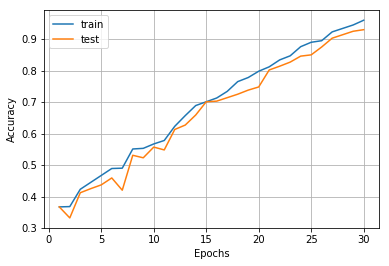

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
fig,ax = plt.subplots(1,1)
ax.set_xlabel('Epochs')
ax.set_ylabel('Accuracy')

# list of epoch numbers
x = list(range(1, epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['train']
ty = history.history['test']
plt_dynamic(x, vy, ty, ax)


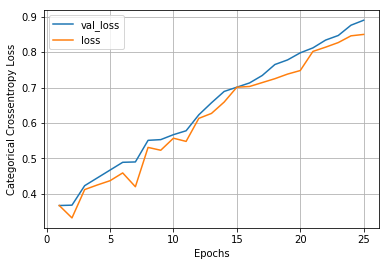

In [15]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('Epochs')
ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1, epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)